### Import

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv('Data/listings_merged.csv')

df.head()

,id,name,description,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,region
0,488614.0,Apartamento acogedor y luminoso en Hendaya,"T2. Charming, cosy and bright apartment, with...",entire rental unit,entire home/apt,4,1.0,1.0,1,"[""hair dryer"", ""essentials"", ""dishes and silve...",...,52,4.85,4.88,4.73,4.98,4.98,4.77,4.79,0.39,64
1,100953.0,Villa Etxe Gorria (Room 2) Biarritz center,"Spacious double bedroom, with bathroom, bathtu...",private room in bed and breakfast,private room,2,1.0,1.0,1,"[""hair dryer"", ""first aid kit"", ""essentials"", ...",...,33,4.91,4.91,4.94,4.82,4.88,4.94,4.79,0.25,64
2,111027.0,Villa Etxe Gorria (Room 4) Biarritz center,"Bedroom for 2 persons, kettle, double bed, sho...",private room in bed and breakfast,private room,2,1.0,1.0,1,"[""hair dryer"", ""essentials"", ""backyard"", ""refr...",...,99,4.86,4.90,4.87,4.83,4.78,4.94,4.82,0.63,64
3,327264.0,Villa de la Corniche on the Basque Coast,"On the Basque Coast, beautiful contemporary an...",entire home,entire home/apt,10,3.5,5.0,6,"[""hair dryer"", ""first aid kit"", ""essentials"", ...",...,53,4.87,4.83,4.74,4.88,4.89,4.92,4.52,0.36,64
4,507979.0,On the riverbanks of l'Adour,This apartment is ideally situated just a step...,entire rental unit,entire home/apt,8,1.0,3.0,5,"[""dishes and silverware"", ""oven"", ""refrigerato...",...,46,4.57,4.60,4.31,4.64,4.71,4.71,4.44,0.35,64


In [109]:
df.shape

(89488, 31)

In [110]:
df.describe()

,id,accommodates,bathrooms,bedrooms,beds,price,latitude,longitude,minimum_nights,maximum_nights,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,8.948800e+04,89488.000000,89463.000000,89325.000000,89488.000000,89488.000000,89488.000000,89488.000000,89488.000000,8.948800e+04,...,89488.000000,89488.000000,89488.000000,89488.000000,89488.000000,89488.000000,89488.000000,89488.000000,89488.000000,89488.000000
mean,6.455806e+17,3.519399,1.225222,1.405083,1.895975,232.990803,47.594107,1.709912,10.600617,2.442802e+04,...,184.027702,29.714621,4.728703,4.772343,4.674510,4.813138,4.829336,4.805459,4.617029,1.283063
std,4.908393e+17,1.924957,0.591710,1.028024,1.350640,556.089364,2.086538,1.656882,42.680528,7.178726e+06,...,119.984636,67.183818,0.341220,0.318293,0.372611,0.303061,0.297136,0.261445,0.372447,1.313891
min,3.109000e+03,1.000000,0.000000,0.000000,0.000000,8.000000,42.995760,-1.786636,1.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4.332457e+07,2.000000,1.000000,1.000000,1.000000,90.000000,45.757947,2.277698,1.000000,3.100000e+01,...,73.000000,1.000000,4.717753,4.767341,4.651712,4.801212,4.825401,4.780000,4.570000,0.500000
50%,8.600612e+17,3.000000,1.000000,1.000000,2.000000,136.000000,48.853600,2.335532,2.000000,3.650000e+02,...,180.000000,7.000000,4.760000,4.803448,4.700185,4.857038,4.869975,4.814543,4.622334,1.091909
75%,1.091100e+18,4.000000,1.000000,2.000000,2.000000,230.000000,48.872026,2.363870,4.000000,7.300000e+02,...,290.000000,29.000000,4.940000,4.960000,4.920000,5.000000,5.000000,4.980000,4.820000,1.420000
max,1.244261e+18,16.000000,42.000000,38.000000,29.000000,30400.000000,48.901590,4.896960,730.000000,2.147484e+09,...,365.000000,3295.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,59.120000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89488 entries, 0 to 89487
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            89488 non-null  float64
 1   name                          89488 non-null  object 
 2   description                   86202 non-null  object 
 3   property_type                 89488 non-null  object 
 4   room_type                     89488 non-null  object 
 5   accommodates                  89488 non-null  int64  
 6   bathrooms                     89463 non-null  float64
 7   bedrooms                      89325 non-null  float64
 8   beds                          89488 non-null  int64  
 9   amenities                     89488 non-null  object 
 10  price                         89488 non-null  int64  
 11  latitude                      89488 non-null  float64
 12  longitude                     89488 non-null  float64
 13  n

### Cleaning

In [112]:
df = df.T.drop_duplicates().T
df.dropna(axis=1, how='all', inplace=True)
df.drop([c for c in df.columns if df[c].nunique()==1], axis=1, inplace=True)
df.drop(df.columns[df.columns.str.contains("url")], axis=1, inplace=True)

### EDA

In [113]:
df['price'].describe()

count     89488
unique     1481
top         100
freq       2339
Name: price, dtype: int64

In [114]:
df['bedrooms'].mean()

1.4050825636719844

In [115]:
df['bathrooms'].mean()

1.2252215999910578

In [116]:
df['review_scores_rating'].mean()

4.7287030815535545

In [117]:
average_annual_availability = df['availability_365'].mean()
estimated_annual_occupancy_rate = 100 - (average_annual_availability / 365 * 100)
estimated_annual_occupancy_rate


49.58145149636655

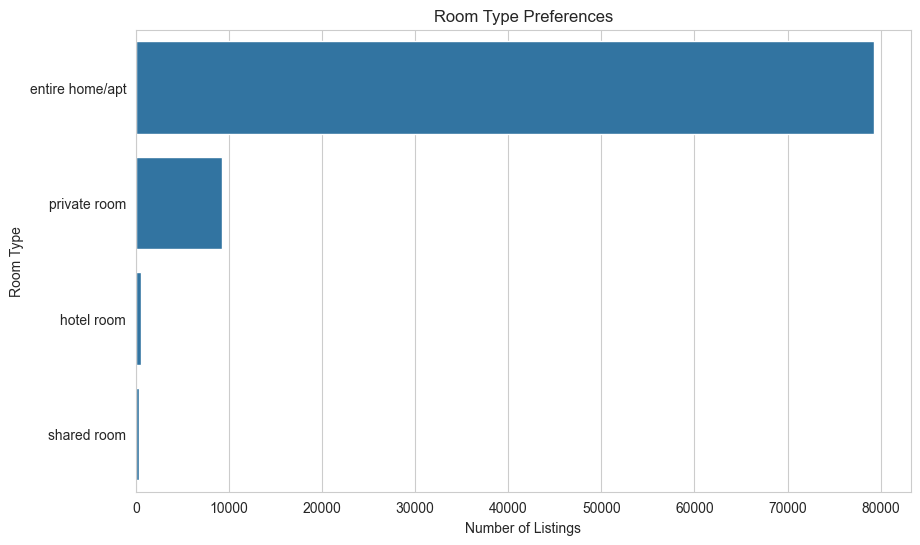

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index)
plt.title('Room Type Preferences')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()

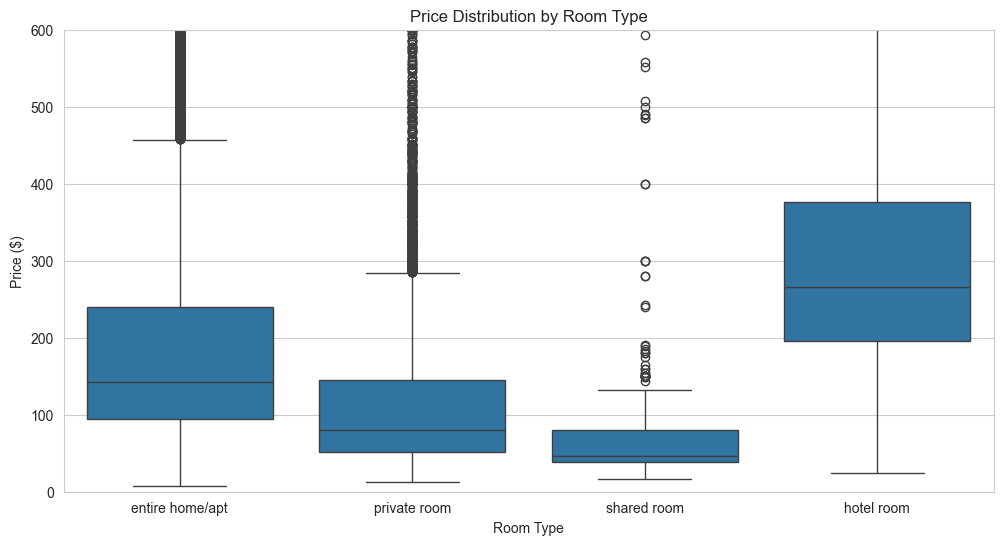

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, df['price'].quantile(0.95))
plt.show()

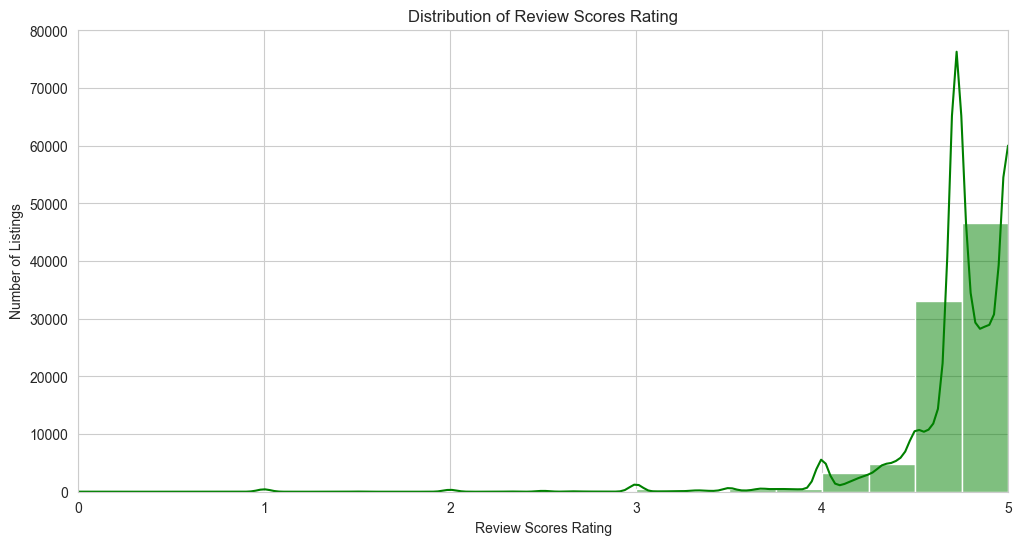

In [120]:
plt.figure(figsize=(12, 6))
sns.histplot(df['review_scores_rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Listings')
plt.xlim(0, 5)
plt.show()

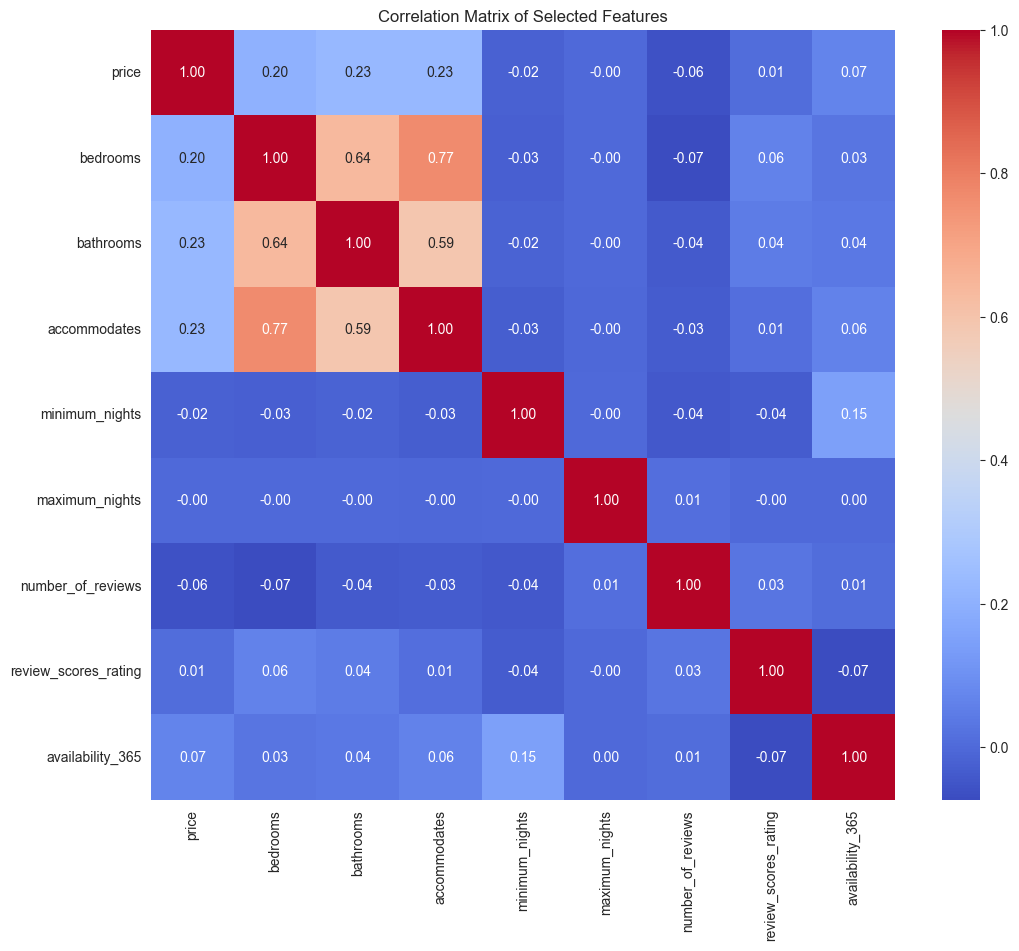

In [121]:
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'accommodates',
    'minimum_nights', 'maximum_nights', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

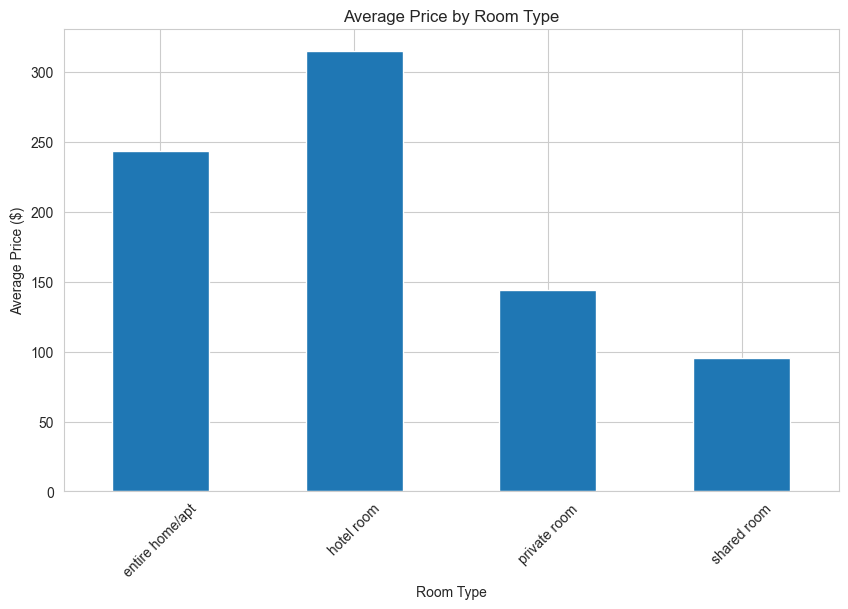

In [122]:
room_price_avg = df.groupby('room_type')['price'].mean()

plt.figure(figsize=(10, 6))
room_price_avg.plot(kind='bar')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

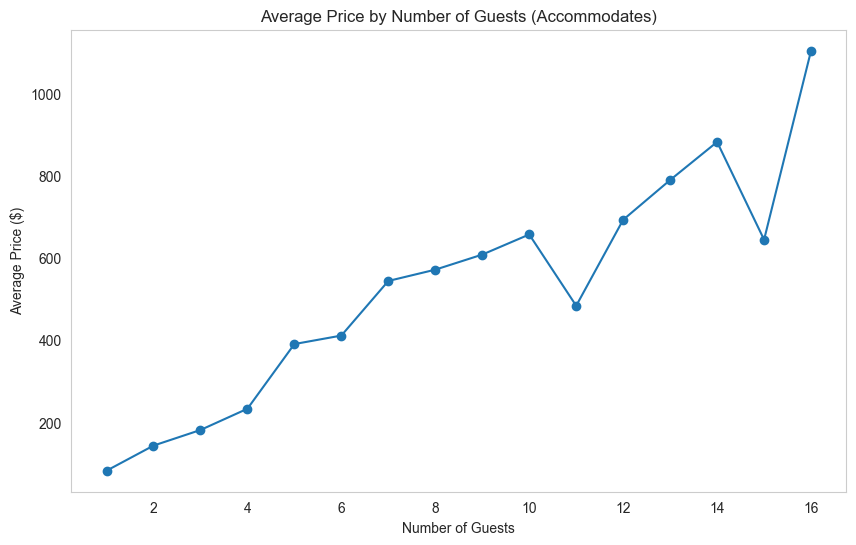

In [123]:
accommodates_price_avg = df.groupby('accommodates')['price'].mean()

plt.figure(figsize=(10, 6))
accommodates_price_avg.plot(kind='line', marker='o')
plt.title('Average Price by Number of Guests (Accommodates)')
plt.xlabel('Number of Guests')
plt.ylabel('Average Price ($)')
plt.grid()
plt.show()